In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# Read species_info.csv and observations.csv
species_df = pd.read_csv('species_info.csv')
observations_df = pd.read_csv('observations.csv')

In [3]:
# Display the first few rows of each dataset
print("Species Info Data:")
print(species_df.head())
print("\nObservations Data:")
print(observations_df.head())

Species Info Data:
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  

Observations Data:
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2  

In [4]:

# Check data types and null values
print("\nData Types and Null Values (Species Info):")
print(species_df.info())
print("\nData Types and Null Values (Observations):")
print(observations_df.info())


Data Types and Null Values (Species Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None

Data Types and Null Values (Observations):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [5]:
# Summary statistics for observations
print("\nSummary Statistics for Observations:")
print(observations_df.describe())


Summary Statistics for Observations:
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


<ipython-input-6-d36146ae85c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=species_df, x='conservation_status', palette='Set2')


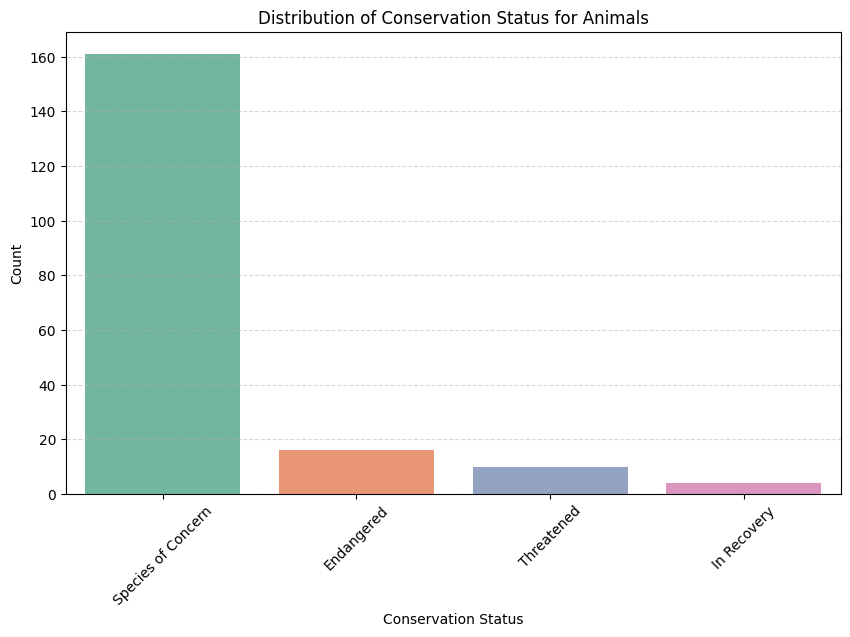

In [6]:
# Distribution of conservation status for animals
plt.figure(figsize=(10, 6))
sns.countplot(data=species_df, x='conservation_status', palette='Set2')
plt.title("Distribution of Conservation Status for Animals")
plt.xlabel("Conservation Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

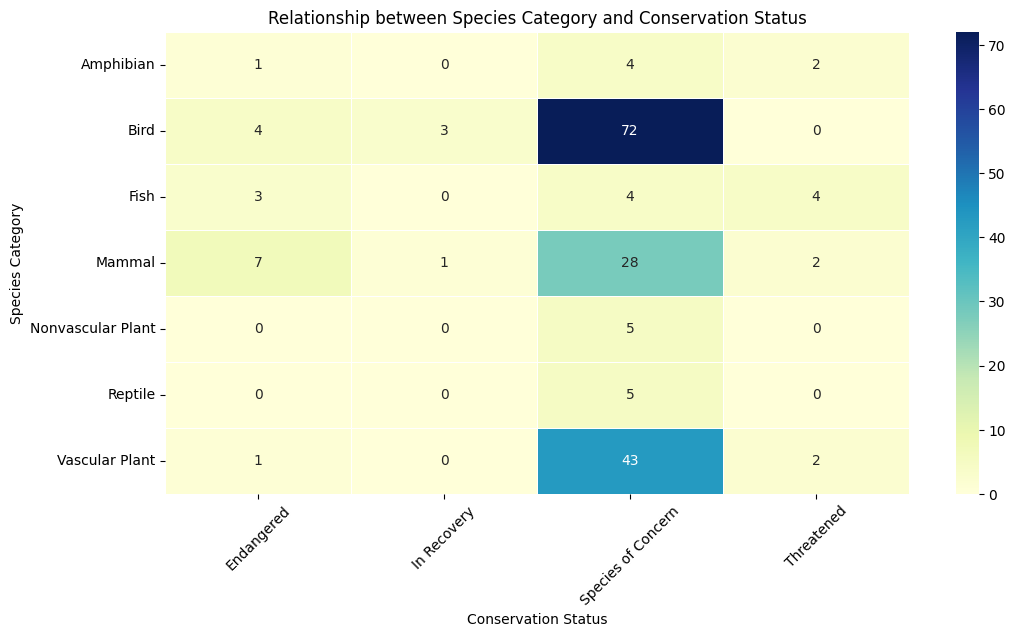

In [7]:

# Relationship between species category and conservation status
cross_tab = pd.crosstab(species_df['category'], species_df['conservation_status'])
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title("Relationship between Species Category and Conservation Status")
plt.xlabel("Conservation Status")
plt.ylabel("Species Category")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

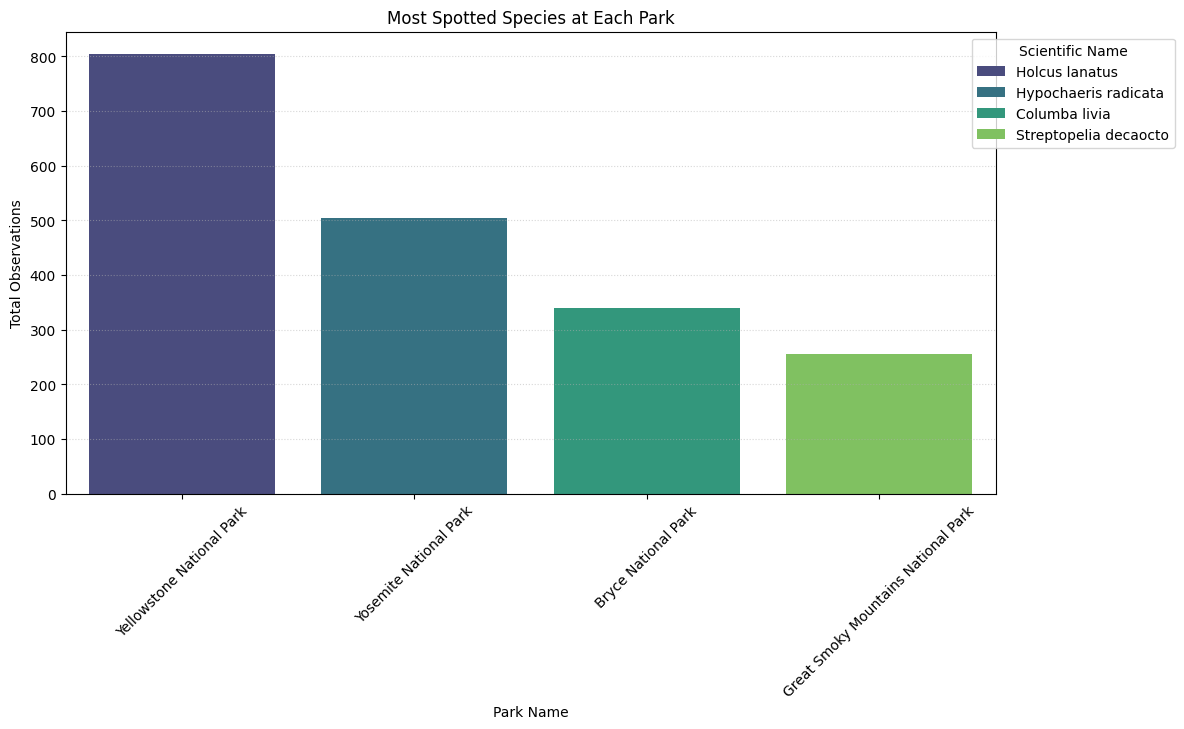

In [8]:
# Most spotted species at each park
most_spotted_species = observations_df.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()
most_spotted_species = most_spotted_species.sort_values(by='observations', ascending=False)
most_spotted_species = most_spotted_species.drop_duplicates(subset='park_name')

plt.figure(figsize=(12, 6))
sns.barplot(data=most_spotted_species, x='park_name', y='observations', hue='scientific_name', palette='viridis')
plt.title("Most Spotted Species at Each Park")
plt.xlabel("Park Name")
plt.ylabel("Total Observations")
plt.xticks(rotation=45)
plt.legend(title='Scientific Name', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.show()
